## Z-test

https://www.omnicalculator.com/statistics/p-value#how-do-i-find-p-value-from-t

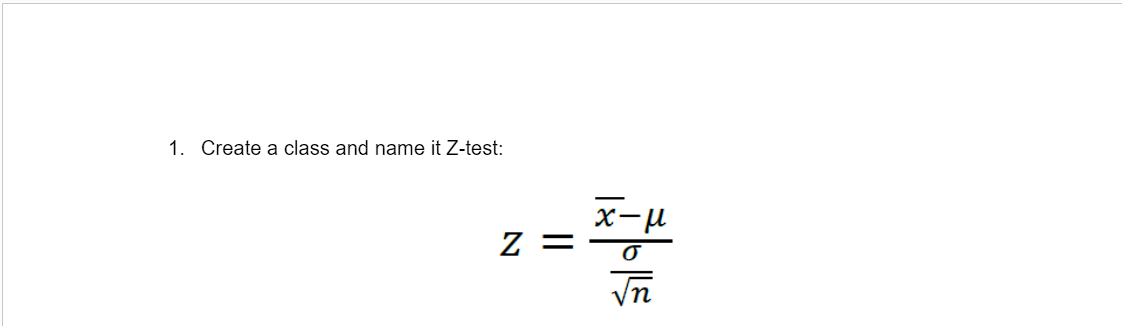

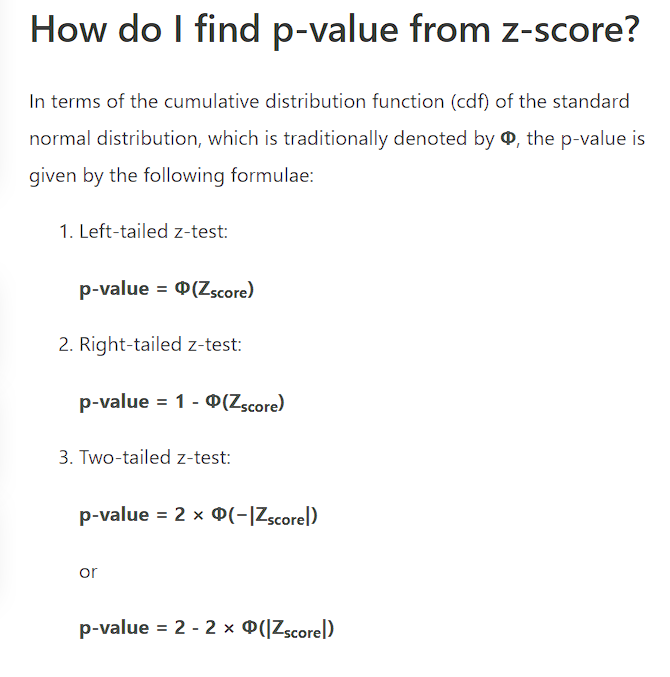

We need 
* sample_data,   
* pop_mean, 
* pop_std and 
* alpha(significance value) as parameters. 
* sample_mean, sample_size(n) can be calculated inside the sample.


The one-tail p-value equals one minus half the two-tailed value. So if the two-tailed p-value is 0.1, the one-tailed p-value is 0.95. The two-tail p-value is twice the one-tail p-value.

In [1]:
import numpy as np
import math
from scipy.stats import norm

In [41]:
class Z_Test:
    def __init__(self, sample_data, pop_mean, pop_std, alpha, tail):
        self.sample_data = sample_data
        self.pop_mean = pop_mean
        self.pop_std = pop_std
        self.alpha = alpha
        self.tail = tail
    def z_score(self):
        sample_size = self.sample_data.size
        sample_mean = self.sample_data.mean().round(2)
        
        #Calculating z-score with the formula above:
        z_score = (sample_mean - self.pop_mean)/(self.pop_std/math.sqrt(sample_size))
        print(f"z_score: {z_score}")
        
        #Calculating p-value using z-score:
        if (self.tail == 2):
            p_value = 2*(1-norm.cdf(abs(z_score)))
            print(f"p-value: {p_value}")
        elif (self.tail==1):
            p_value = (1-norm.cdf(abs(z_score)))
            print(f"For left tailed, p-value: {p_value}\nFor right tailed, p-value: {1-p_value}")
            
        
        
        #Decision based on p-value and alpha:
        if p_value > alpha:
            print('Fail to reject H0 (Accept H0). The mean of the population is considered to be equal to', self.pop_mean)
        else:
            print('Reject H0 (Accept H1). The mean of the population is NOT equal to', self.pop_mean)
        

##### Z-test:
Suppose we are testing a new model of cell-phone and want to compare its bandwidth to the previous model.

Sample = [4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428,  4.533, 4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111, 5.096, 5.232, 5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438, 4.754, 4.966, 4.285, 4.482, 4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554, 4.42 , 5. , 5.126, 5.082, 4.944, 4.658]

* State the null and alternative hypotheses.
* Use the Z-test to determine whether the new model has a significantly different bandwidth 4.5 GHz from the previous model with a standard deviation of 0.6 GHz, using a significance level of 0.05.
* Interpret the results


In [42]:
# Given:
cellphone_sample = np.array([4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428, 4.533, 4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111, 5.096, 5.232, 5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438, 4.754, 4.966, 4.285, 4.482, 4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554, 4.42 , 5. , 5.126, 5.082, 4.944, 4.658])
pop_std = 0.6
pop_mean = 4.5
alpha = 0.05

In [43]:
H0 = "New model has 4.5GHz bandwidth" 
H1 = "New model does not have 4.5GHz bandwidth" #two tailed

In [46]:
z_test_cellphone_bandwidth = Z_Test(sample_data = cellphone_sample, pop_mean = pop_mean, pop_std = pop_std, alpha = alpha, tail=2)

In [47]:
z_test_cellphone_bandwidth.z_score()

z_score: 2.884441020371194
p-value: 0.0039210919990071424
Reject H0 (Accept H1). The mean of the population is NOT equal to 4.5


## T-test

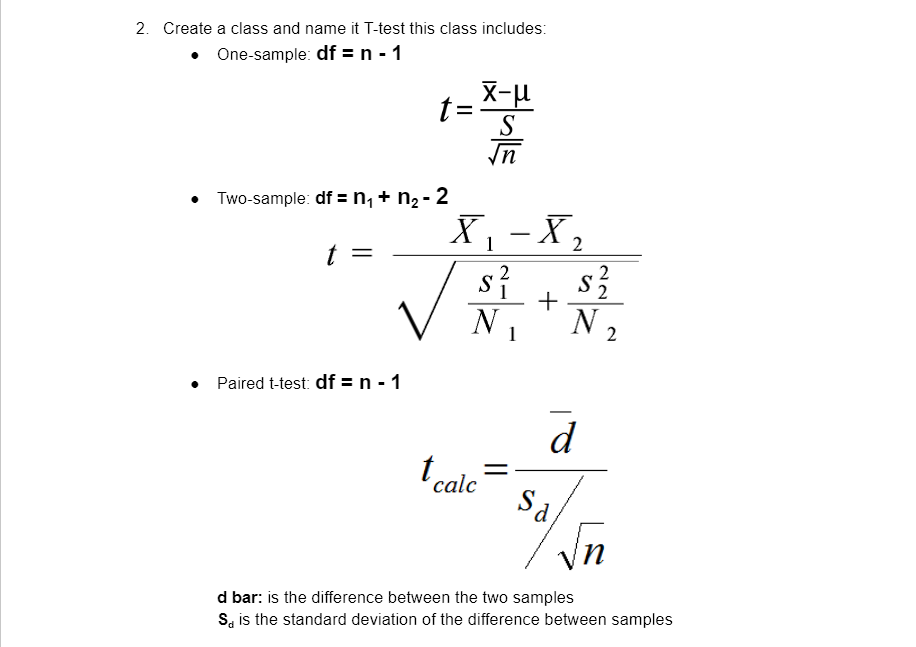

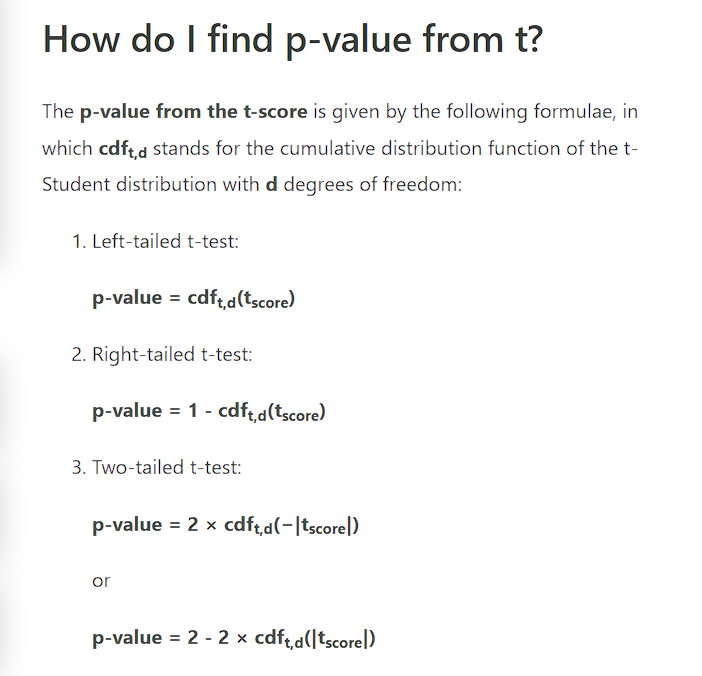

We need 
* sample_data
* pop_mean
* alpha
* sample_mean, sample_std, sample_size can be found from sample_data
* degree of freedom (df can be found from sample data) to find p-value

In [91]:
from scipy.stats import t,ttest_1samp
class T_test:
    
    def one_sample(self, sample_data, pop_mean, alpha, tail):
#         sample_data = np.array(sample_data)
        sample_mean = sample_data.mean()
        sample_std = sample_data.std()
        sample_size = sample_data.size
        
        #Calculating t_statistic from formula:
        t_stat = ((sample_mean-pop_mean)/(sample_std/math.sqrt(sample_size))).round(2)
        print(f"t-stat: {t_stat}")
        
        #Calculating p-value using t-stat:
        df = sample_size -1 
        if (tail == 2):
            p_value = 2 * (1-t.cdf(abs(t_stat), df))
            print(f"p-value: {p_value}")
        elif (tail==1):
            p_value = (1-t.cdf(abs(t_stat), df))
            print(f"For left tailed, p-value: {p_value}\nFor right tailed, p-value: {1-p_value}")
            
        #Decision based on p-value and alpha:
        if p_value > alpha:
            print("Fail to reject H0 (Accept H0).")
        else:
            print("Reject H0 (Accept H1).")
                  
            
    def two_sample(self, sample_data1, sample_data2, alpha, tail):
#         sample_data1 = np.array(sample_data1)
#         sample_data2 = np.array(sample_data2)
        
        #means:
        sample_mean1 = sample_data1.mean()
        sample_mean2 = sample_data2.mean()
        
        #variances:
        sample_variance1 = sample_data1.var()
        sample_variance2 = sample_data2.var()
        
        #calculating t_stat from formula:
        t_stat = (sample_mean1 - sample_mean2)/math.sqrt((sample_variance1/sample_data1.size)+(sample_variance2/sample_data2.size))
        print(f"t-stat: {t_stat}")
        
        #Calculating p-value using t-stat:
        df = sample_data1.size + sample_data2.size - 2 
        if (tail == 2):
            p_value = 2 * (1-t.cdf(abs(t_stat), df))
            print(f"p-value: {p_value}")
        elif (tail==1):
            p_value = (1-t.cdf(abs(t_stat), df))
            print(f"For left tailed, p-value: {p_value}\nFor right tailed, p-value: {1-p_value}")
        
        #Decision based on p-value and alpha:
        if p_value > alpha:
            print("Fail to reject H0 (Accept H0).")
        else:
            print("Reject H0 (Accept H1).")
    
                  
    def paired(self, before, after, alpha, lazy=False):
        n = before.size
        df = n - 1
        diff = after - before
        
        if lazy:
            self.One_sample(diff, 0)
        else:
            print(f"after-before: {diff}")
            std = diff.std(ddof=1)
            
            #calculating t_stat from formula:
            t_stat = diff.mean()/(std/math.sqrt(n))
            print(f"t-stat: {t_stat}")
            
                  
            #Calculating p-value using t-stat:
            p_value = round(2 * (1-t.cdf(abs(t_stat), df)), 10)
            print(f"p-value: {p_value}")
            
        #Decision based on p-value and alpha:
        if p_value > alpha:
            print("Fail to reject H0 (Accept H0).")
        else:
            print("Reject H0 (Accept H1).")

### Q 2a. 

One sample T-test: Suppose we have a new manufacturing process for producing aluminum cans, and we want to test whether the mean weight of the cans produced using this new process is significantly different from the target weight of 15 grams. We randomly sample 30 cans produced using the new process and measure their weights in grams. We obtain the following data: 

Sample = [14.8, 15.2, 15.1, 15.3, 15.0, 14.9, 15.2, 14.8, 15.1, 15.0, 14.9, 14.8, 15.2, 14.9, 15.0, 14.9, 15.1, 15.3, 15.0, 15.1, 14.8, 15.0, 15.2, 15.1, 15.3, 15.1, 15.0, 14.8, 15.2, 15.0]

* State the null and alternative hypotheses.
* Use the appropriate T-test to determine whether the mean weight of the produced cans is equal to the target weight of 15 grams, using a significance level of 0.05.
* Interpret the results


In [92]:
# Given:
cans_sample_data =  np.array([14.8, 15.2, 15.1, 15.3, 15.0, 14.9, 15.2, 14.8, 15.1, 15.0, 14.9, 14.8, 15.2, 14.9, 15.0, 14.9, 15.1, 15.3, 15.0, 15.1, 14.8, 15.0, 15.2, 15.1, 15.3, 15.1, 15.0, 14.8, 15.2, 15.0])
pop_mean = 15
alpha = 0.05

H0 = "Mean weight is 15g"
H1 = "Mean weight is not 15g"

In [93]:
cans_t_test = T_test().one_sample(cans_sample_data, pop_mean, 0.05, 2 )

t-stat: 1.29
p-value: 0.2072430270911616
Fail to reject H0 (Accept H0).


### Q. 2b
Two Sample T-test: Suppose a food company has developed a new flavor of potato chips and wants to compare it to the current best-selling flavor. The company randomly selects two groups of 20 customers each. The first group is given the new flavor of potato chips, while the second group is given the best-selling flavor. After trying the potato chips, each customer rates the flavor on a scale of 1 to 10. The following are the flavor ratings for the two groups:

New flavor = [8, 7, 9, 6, 7, 8, 9, 7, 8, 7, 6, 8, 7, 9, 8, 7, 6, 9, 8, 7]
Best selling flavor = [6, 7, 8, 6, 7, 6, 7, 6, 8, 7, 6, 7, 6, 8, 7, 6, 7, 8, 6, 7]

* State the null and alternative hypotheses.
* Use the appropriate T-test to determine whether there is a significant difference between the two groups or not, using a significance level of 0.05.
* Interpret the results



In [94]:
#Given:
sample_data1 = np.array( [8, 7, 9, 6, 7, 8, 9, 7, 8, 7, 6, 8, 7, 9, 8, 7, 6, 9, 8, 7])
sample_data2 = np.array( [6, 7, 8, 6, 7, 6, 7, 6, 8, 7, 6, 7, 6, 8, 7, 6, 7, 8, 6, 7])
alpha = 0.05

H0 = ""
Ha = ""

flavor_t_test = T_test().two_sample(sample_data1, sample_data2, 0.05, 2)

t-stat: 2.731791823540765
p-value: 0.009502268052439033
Reject H0 (Accept H1).


### Q. 2c

Paired T-test: Suppose a company wants to evaluate a new training program for its employees. The company selects 20 employees and measures their productivity before and after the training program. The following are the productivity scores (number of tasks completed per hour) for each employee before and after the training:

Before = [15, 18, 12, 10, 17, 16, 12, 14, 19, 18, 11, 13, 16, 17, 19, 14, 16, 13, 15, 12]
After = [18, 20, 15, 13, 19, 18, 14, 16, 21, 20, 14, 16, 19, 20, 22, 16, 18, 15, 17, 14]

* State the null and alternative hypotheses.
* Use the appropriate T-test to determine whether the new training program has had an effect on employee productivity, with a significance level of 0.05.


In [95]:
#Given:
before = np.array( [15, 18, 12, 10, 17, 16, 12, 14, 19, 18, 11, 13, 16, 17, 19, 14, 16, 13, 15, 12])
after = np.array([18, 20, 15, 13, 19, 18, 14, 16, 21, 20, 14, 16, 19, 20, 22, 16, 18, 15, 17, 14])
aplha = 0.05

training_t_test = T_test().paired(before, after, 0.05)

after-before: [3 2 3 3 2 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2]
t-stat: 21.354156504062622
p-value: 0.0
Reject H0 (Accept H1).


## Anova test

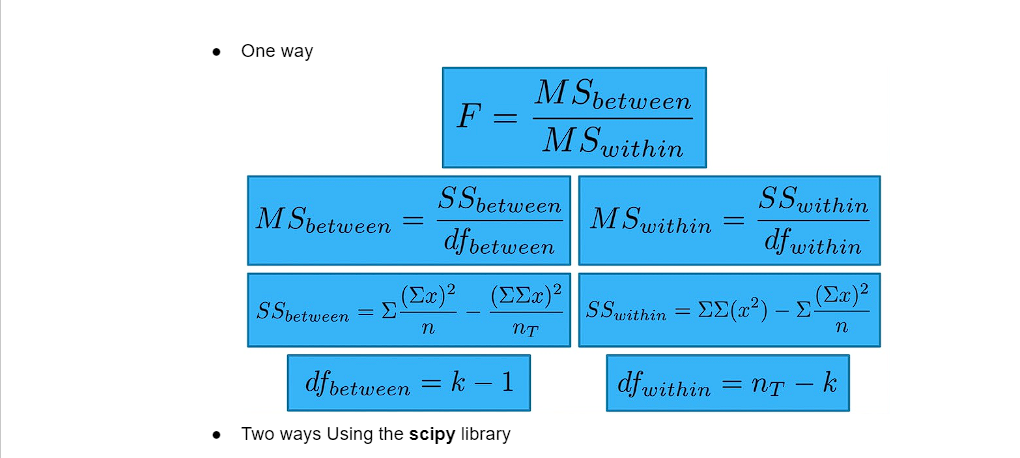

## Chi-square test

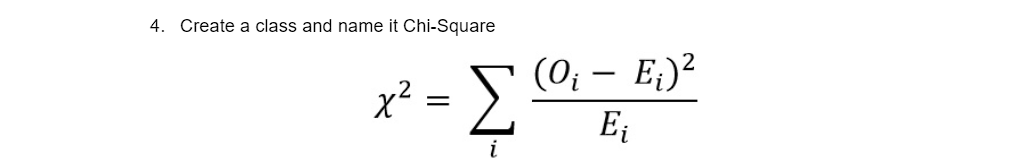

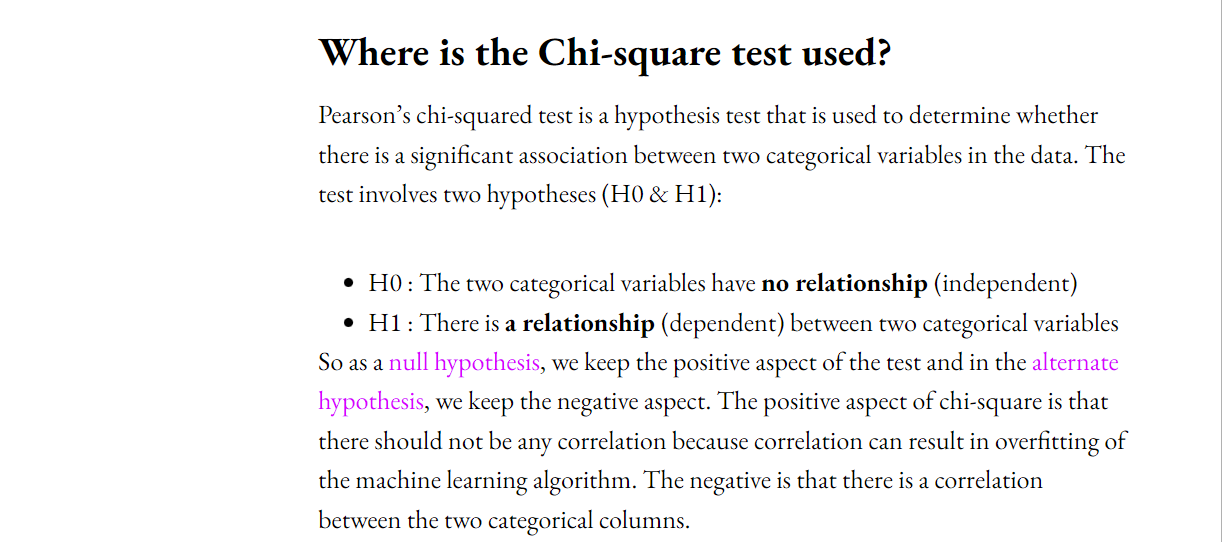

https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/

Chi-square formula is a statistical formula to compare two or more statistical data sets. It is used for data that consist of variables distributed across various categories and is denoted by χ2. The chi-square formula is: 
    
    χ2 = ∑(Oi – Ei)2/Ei, where 
    * Oi = observed value (actual value) and 
    * Ei = expected value. 

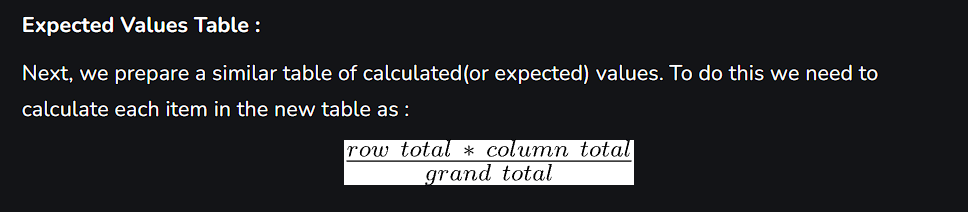

Since we are dealing with array, we don't have columns. So, expected value is just sum of all the items * probability

In [111]:
from scipy.stats import chi2

class Chi_square():
    def test(self, observed, alpha, prob =1):
        n = observed.size
        
        #calculating expected values
        expected = np.array([prob]*n) * np.sum(observed)
        print(f"Expected_values: {expected}")
        
        #calculating chi_stat with the formula
        chi_stat = np.sum((observed - expected)**2 / expected)
        print(f"Chi-square-stat: {chi_stat}")
        
        #calculating p-value using chi_stat:
        p_value = 1 - chi2.cdf(chi_stat, n-1)
        print(f"p-value: {p_value}")
        
        #Decision based on p-value and alpha:
        if p_value > alpha:
            print("Fail to reject H0 (Accept H0).")
        else:
            print("Reject H0 (Accept H1).")
        

## Q.4 


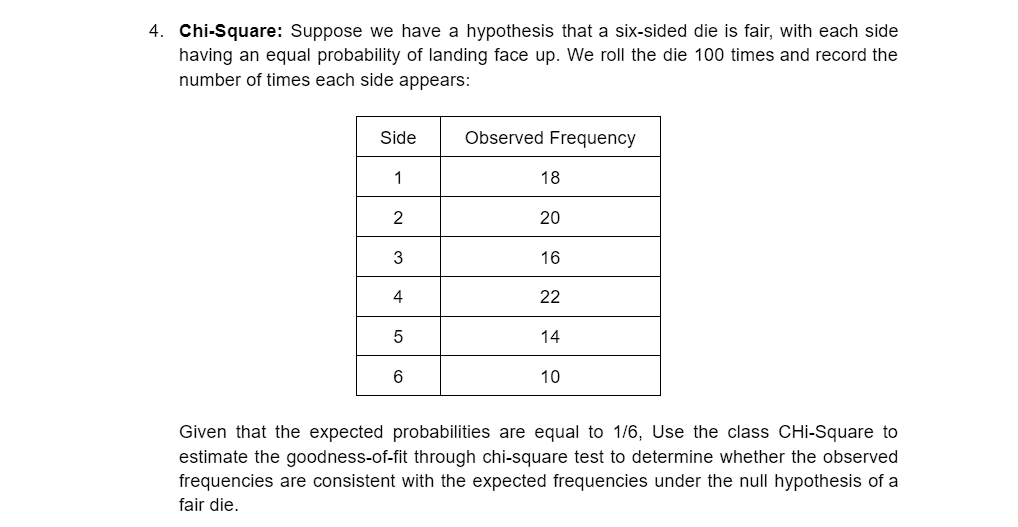

In [112]:
observed_freq = np.array([18, 20, 16, 22, 14, 10])
expected_probability = 1/6
alpha = 0.05

dice_chi_square_test = Chi_square().test(observed_freq, 0.05, 1/6)

Expected_values: [16.66666667 16.66666667 16.66666667 16.66666667 16.66666667 16.66666667]
Chi-square-stat: 5.600000000000001
p-value: 0.3471050682817156
Fail to reject H0 (Accept H0).


## A/B testing